In [1]:
import pandas as pd

data = pd.read_csv('train.csv.zip')
data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [2]:
data.shape

(159571, 8)

In [3]:
toxClass = list(data.columns[2:])
toxClass

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [4]:
counts = data.iloc[:, 2:].sum()
no_ones_rows = data[(data.iloc[:, 2:] == 0).all(axis=1)]
free = len(no_ones_rows)
counts['toxic free'] = free
counts

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
toxic free       143346
dtype: int64

In [5]:
import plotly.express as px

fig = px.pie(values=counts, names=counts.index, title='Count of Toxic Labels')
fig.show()

In [6]:
for i in toxClass:
    print(100*data[i].value_counts(normalize=True))
    print()

toxic
0    90.415552
1     9.584448
Name: proportion, dtype: float64

severe_toxic
0    99.000445
1     0.999555
Name: proportion, dtype: float64

obscene
0    94.705178
1     5.294822
Name: proportion, dtype: float64

threat
0    99.700447
1     0.299553
Name: proportion, dtype: float64

insult
0    95.063639
1     4.936361
Name: proportion, dtype: float64

identity_hate
0    99.119514
1     0.880486
Name: proportion, dtype: float64



In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kartheepan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kartheepan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data['comment_text'][115606]

'Feel the might of Cyber Apocalypse! \n\nyyyyyyyyyyyyyyybvgtfrrrrrbyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy

In [9]:
preprocessedText = []
for i in range(0, data.shape[0]):
    if i == 115606 : preprocessedText.append(preprocess_text('Feel the might of Cyber Apocalypse!'))
    else : preprocessedText.append(preprocess_text(data['comment_text'][i]))

In [11]:
data['comment_text'] = preprocessedText
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seemingli stuc...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im realli tri edit war guy constantli ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chanc rememb page that,0,0,0,0,0,0


## SMOTE

In [12]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack

X = data['comment_text']
y = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X)
print(X_train_tfidf.shape)

X_resampled_list = {}
y_resampled_list = {}

smote = SMOTE(random_state=42)
for column in y.columns:
    X_res, y_res = smote.fit_resample(X_train_tfidf, y[column])
    print(X_res.shape, y_res.shape)
    X_resampled_list[column] = X_res
    y_resampled_list[column] = pd.DataFrame(y_res, columns=[column])

(159571, 10000)
(288554, 10000) (288554,)
(315952, 10000) (315952,)
(302244, 10000) (302244,)
(318186, 10000) (318186,)
(303388, 10000) (303388,)
(316332, 10000) (316332,)


## Logistic Regression

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, hamming_loss

for column in X_resampled_list:
    x = X_resampled_list[column]
    y = y_resampled_list[column]

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    classifier = LogisticRegression(penalty='l2', random_state=42, max_iter=500)
    classifier.fit(X_train, y_train)
    classifiers = classifier
    
    y_pred = classifier.predict(X_test)

    print(f"\nClassification Report for {column}:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Hamming Loss:", hamming_loss(y_test, y_pred))

/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Classification Report for toxic:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     28854
           1       0.92      0.95      0.93     28857

    accuracy                           0.93     57711
   macro avg       0.93      0.93      0.93     57711
weighted avg       0.93      0.93      0.93     57711

Accuracy Score: 0.9326471556549012
Hamming Loss: 0.06735284434509886


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Classification Report for severe_toxic:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     31656
           1       0.96      1.00      0.98     31535

    accuracy                           0.98     63191
   macro avg       0.98      0.98      0.98     63191
weighted avg       0.98      0.98      0.98     63191

Accuracy Score: 0.9752812900571284
Hamming Loss: 0.024718709942871613


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Classification Report for obscene:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     30250
           1       0.95      0.97      0.96     30199

    accuracy                           0.96     60449
   macro avg       0.96      0.96      0.96     60449
weighted avg       0.96      0.96      0.96     60449

Accuracy Score: 0.9573524789491968
Hamming Loss: 0.042647521050803154


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Classification Report for threat:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     31868
           1       0.99      1.00      1.00     31770

    accuracy                           1.00     63638
   macro avg       1.00      1.00      1.00     63638
weighted avg       1.00      1.00      1.00     63638

Accuracy Score: 0.9959143907728087
Hamming Loss: 0.004085609227191301


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Classification Report for insult:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     30427
           1       0.93      0.97      0.95     30251

    accuracy                           0.95     60678
   macro avg       0.95      0.95      0.95     60678
weighted avg       0.95      0.95      0.95     60678

Accuracy Score: 0.9478229341771317
Hamming Loss: 0.052177065822868254


/Users/kartheepan/miniforge3/envs/amd_gpu/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Classification Report for identity_hate:
              precision    recall  f1-score   support

           0       1.00      0.94      0.96     31550
           1       0.94      1.00      0.97     31717

    accuracy                           0.97     63267
   macro avg       0.97      0.97      0.97     63267
weighted avg       0.97      0.97      0.97     63267

Accuracy Score: 0.9659063966997012
Hamming Loss: 0.03409360330029874


## WordCloud

In [53]:
from collections import defaultdict
toxicDic = defaultdict(list)

for index, row in data.iterrows():
    for toxicTrait in data.columns[2:]:
        if row[toxicTrait] == 1:
            toxicDic[toxicTrait].append(row['comment_text'])

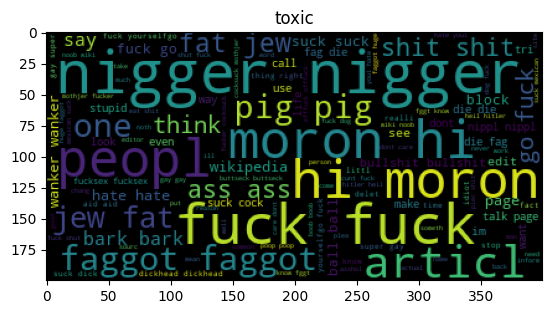

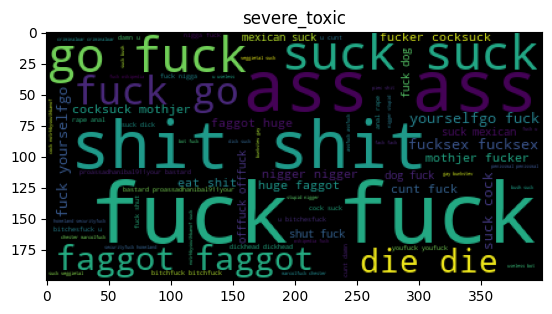

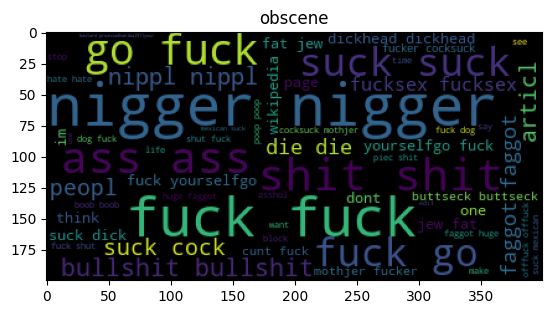

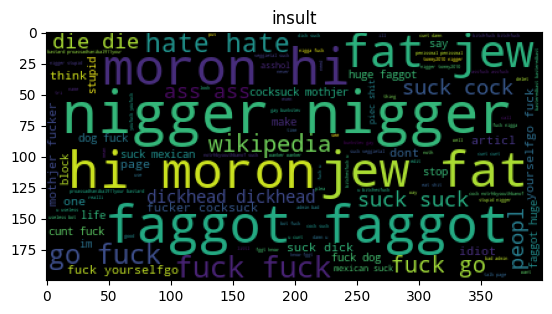

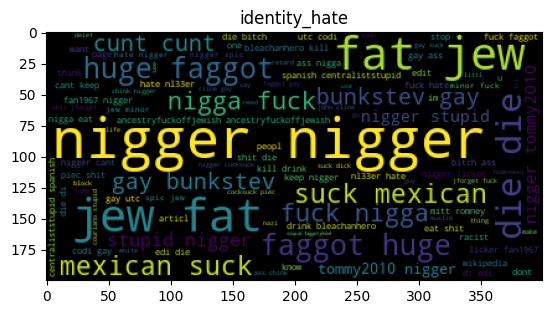

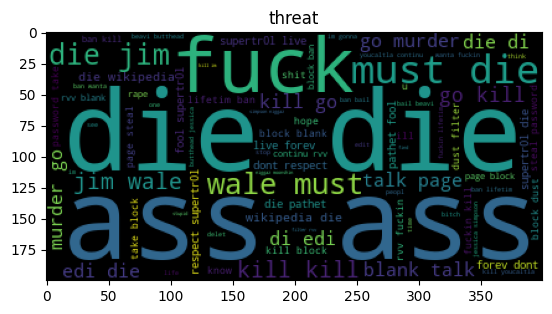

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
f = 221

for toxicTrait in toxicDic:
    words = ''
    for sentence in toxicDic[toxicTrait] : words += sentence
    wc = wordcloud = WordCloud(background_color='black').generate(words)
    plt.figure(f)
    plt.title(toxicTrait)
    plt.imshow(wc)
    f += 1

## RNN

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(data['comment_text'])
sequences = tokenizer.texts_to_sequences(data['comment_text'])
padded_sequences = pad_sequences(sequences) 
x = np.asarray(padded_sequences)
y = np.asarray(data[['toxic','severe_toxic','obscene', 'threat','insult','identity_hate']])
num_words = len(tokenizer.word_index) + 1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

In [18]:
from keras.models import Sequential
from keras import layers
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential(
[
    layers.Embedding(num_words, 1000),
    layers.SimpleRNN(128, dropout = 0.9),
    layers.Dropout(0.1),
    layers.Dropout(0.05),
    layers.Dense(6, activation = 'softmax')
    
])

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2024-06-29 17:56:26.072930: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-29 17:56:26.073277: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
model.compile(optimizer='RMSprop',
               loss='categorical_crossentropy', 
               metrics=['acc'])

In [27]:
early_stopping = EarlyStopping(
    patience=3,
    min_delta=0.001,
    restore_best_weights=True,
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size= 256,
    epochs=20,
    callbacks=[early_stopping],
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/20


2024-06-29 18:20:31.686955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-29 18:20:32.062604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x100xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain

498/499 [============================>.] - ETA: 1s - loss: 0.1456 - acc: 0.9782

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x168x1x100xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x168x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerforman

499/499 [==============================] - ETA: 0s - loss: 0.1455 - acc: 0.9782

2024-06-29 18:33:20.637979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-29 18:33:20.840501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_o

499/499 [==============================] - 791s 2s/step - loss: 0.1455 - acc: 0.9782 - val_loss: 0.1415 - val_acc: 0.9941
Epoch 2/20


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x171x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x171x1x6xi1>'


499/499 [==============================] - 2082s 4s/step - loss: 0.1416 - acc: 0.9936 - val_loss: 0.1410 - val_acc: 0.9942
Epoch 3/20
499/499 [==============================] - 747s 1s/step - loss: 0.1410 - acc: 0.9940 - val_loss: 0.1446 - val_acc: 0.9940
Epoch 4/20
499/499 [==============================] - 818s 2s/step - loss: 0.1397 - acc: 0.9940 - val_loss: 0.1437 - val_acc: 0.9942


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x6xi1>'


998/998 [==============================] - 49s 49ms/step - loss: 0.1415 - acc: 0.9941
Test Accuracy: 99.41%


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x11x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x11x1x6xi1>'


## LSTM

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

x = data['comment_text']
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
labels_train = data[classes].values

In [21]:
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x))
list_tokenized_train = tokenizer.texts_to_sequences(x)

In [22]:
maxlen = 150
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
x_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
y = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_t, labels_train, test_size=0.2, random_state=42)

In [24]:
from keras.layers import GlobalMaxPool1D

model = Sequential(
    [
    layers.Input( shape = (maxlen, )),
    layers.Embedding(max_features, 128),
    LSTM(100, return_sequences = True),
    GlobalMaxPool1D(),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
]
)

In [25]:
model.compile(optimizer='adam',
               loss='binary_crossentropy', 
               metrics=['acc'])

In [26]:
early_stopping = EarlyStopping(
    patience=2,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=20,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],
)

Epoch 1/20


2024-06-29 18:02:53.902836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-29 18:02:54.129968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x64x1x100xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_

1994/1995 [============================>.] - ETA: 0s - loss: 0.0887 - acc: 0.9600

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x40x1x100xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x40x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformance

1995/1995 [==============================] - ETA: 0s - loss: 0.0887 - acc: 0.9600

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x40x1x100xi1>'
2024-06-29 18:05:08.590631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-29 18:05:08.672064: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_

1995/1995 [==============================] - 143s 71ms/step - loss: 0.0887 - acc: 0.9600 - val_loss: 0.0506 - val_acc: 0.9940
Epoch 2/20
   1/1995 [..............................] - ETA: 4:07 - loss: 0.0466 - acc: 1.0000

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x43x1x6xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x43x1x6xi1>'


1995/1995 [==============================] - 139s 70ms/step - loss: 0.0478 - acc: 0.9927 - val_loss: 0.0484 - val_acc: 0.9940
Epoch 3/20
1995/1995 [==============================] - 140s 70ms/step - loss: 0.0432 - acc: 0.9924 - val_loss: 0.0482 - val_acc: 0.9941
Epoch 4/20
1995/1995 [==============================] - 139s 70ms/step - loss: 0.0392 - acc: 0.9923 - val_loss: 0.0477 - val_acc: 0.9935
